In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("loan.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape #to get number of cols and rows in the dataset

(614, 13)

In [5]:
#lets get the missing values i.e null values in the dataset
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#total number of null values:
dataset.isnull().sum().sum()

np.int64(149)

In [7]:
#lets get the missing values in percentage:
(dataset.isnull().sum()/dataset.shape[0])*100                       #dataset.shape[0] = number of rows

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
#total missing values percentage:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100      

np.float64(1.8667000751691305)

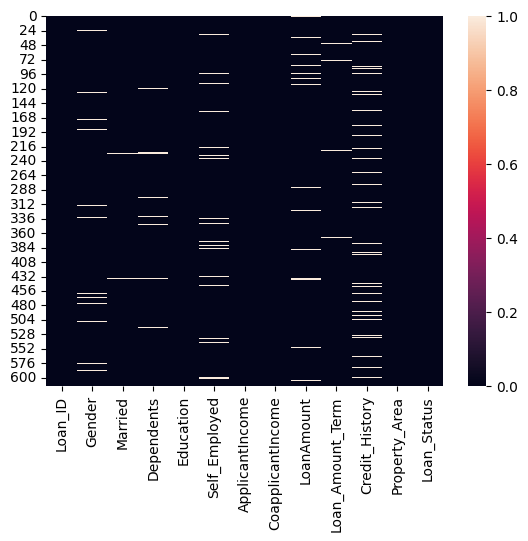

In [9]:
#lets plot the graph of null values:
sns.heatmap(dataset.isnull())
plt.show()

In [10]:
#the white lines shows the presence of null values

In [11]:
#there are two ways of handling missing values:
# 1)delete the entire row or column (preffered only of missing values are more than 50%)
# 2)filling the null values

In [13]:
# 1):-  
# lets delete the column credit_history as it contains the most missing values
dataset.drop(columns=["Credit_History"],inplace=True)

In [15]:
#now lets check the null values again:we will find that Credit_History column is not present anymore
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

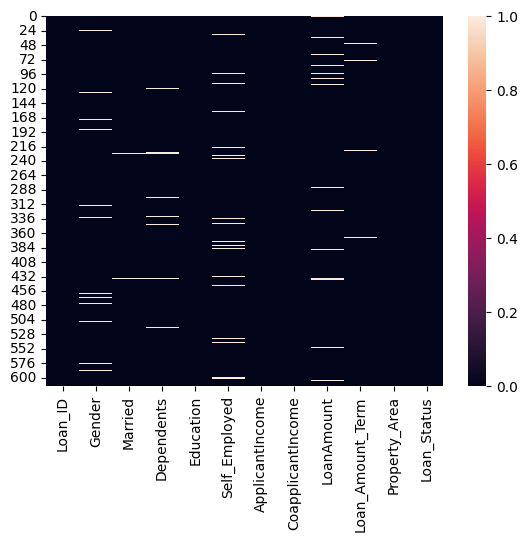

In [16]:
#displaying the change in heatmap:
sns.heatmap(dataset.isnull())
plt.show()

In [18]:
# 2):-  
# lets Fill the missing values
#first find the datatype of data

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [24]:
# for catagorical data we use backward filling , forward filling or mode .. 
#(most preffered is mode , i.e to fill the most appeared value in place of missing values)
#(backward filling is filling the value present in next row or col at place of null value)
#(forward filling is filling the value present in previous row or col at place of null value)

In [31]:
#to use mode method we first find the mode of that categorical data (i.e the value which occurred the most)
mo_fill = dataset["Gender"].mode()[0]
mo_fill

'Male'

In [35]:
#now lets fill this mode value at the null places in Genders col
dataset["Gender"].fillna(mo_fill,inplace=True)

In [37]:
#now we can see that there will be no null values in Gender
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
#this was for a single column , but we have more columns having categorical data , we can fill them all at onne time:
#lets first collect all columns with categorical data ...(filtering)
ct_data = dataset.select_dtypes(include="object")
ct_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [40]:
#lets get null count of all categorical data
ct_data.isnull().sum()

Loan_ID           0
Gender            0
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [48]:
#now lets fill all at once using for loop:
for i in ct_data.columns:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

C:\Users\santo\AppData\Local\Temp\ipykernel_6212\2134577749.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace=True)


In [51]:
#lets check now:
ct_data.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [52]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
#hence we filled all null values of the categorical data


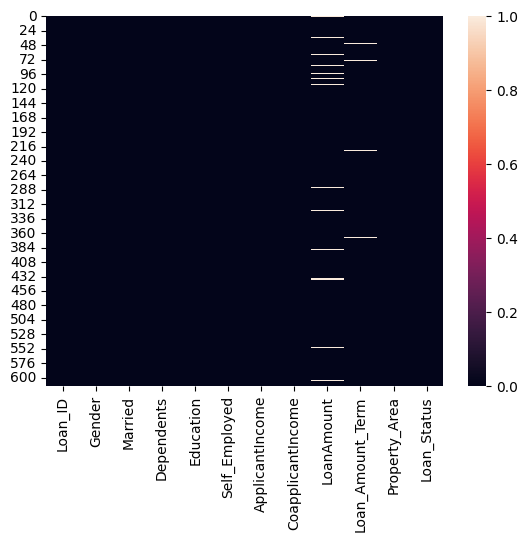

In [57]:
sns.heatmap(dataset.isnull())
plt.show()

In [58]:
#only numerical null-values are remaining ,, we can also fill them by same method , by filling the mean at the null places